In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

C:\Users\Egharevba Blessing\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from collections import Counter
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [3]:
pd.options.display.max_columns = 60

In [4]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv.xls")

In [5]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


Feature Engineering

In [8]:
# Total CPK normal values: 10 to 120 micrograms per liter (mcg/L)
def set_cpk(row):
    if row["creatinine_phosphokinase"] < 10:
        return "Low"
    elif row["creatinine_phosphokinase"] >=10 and row["creatinine_phosphokinase"] <= 120:
        return "Normal"
    else:
        return "High"
    
df = df.assign(cpk_desc = df.apply(set_cpk, axis = 1))

# EJECTION FRACTION    HEART'S PUMPING ABILITY
# Normal               50-75 %
# Below Normal         36-49 %
# Low                  35% and below

def set_eject_fract(row):
    if row["ejection_fraction"] <= 35:
        return "Low"
    elif row["ejection_fraction"] > 35 and row["ejection_fraction"] <= 49:
        return "Below_Normal"
    elif row["ejection_fraction"] > 50 and row["ejection_fraction"] <= 75:
        return "Normal"
    else:
        return "High"
    
df = df.assign(ejection_fraction_desc = df.apply(set_eject_fract, axis = 1))




#  For women, the average platelet count is between 157,000 and 371,000 per microliter of blood. 
#  For men, the average is between 135,000 and 317,000 per microliter of blood
def set_platelets(row):    
    if row["sex"] == 0:  #females
        if row["platelets"] < 157000:
            return "Low"
        elif row["platelets"] >=157000 and row["platelets"] <= 371000:
            return "Normal"
        else:
            return "High"
        
    elif row["sex"] == 1:  #males
        if row["platelets"] < 135000:
            return "Low"
        if row["platelets"] >= 135000 and row["platelets"] <= 317000:
            return "Normal"
        else:
            return "High"
    
df = df.assign(platelets_desc = df.apply(set_platelets, axis = 1))



# The normal range for blood sodium levels is 135 to 145 milliequivalents per liter (mEq/L)

def set_sodium(row):
    if row["serum_sodium"] < 135:
        return "Low"
    elif row["serum_sodium"] >=135 and row["serum_sodium"] <= 145:
        return "Normal"
    else:
        return "High"
df = df.assign(sodium_desc = df.apply(set_sodium, axis = 1))
    
    
# Normal levels of creatinine in the blood are approximately 0.6 to 1.2 milligrams (mg) per deciliter (dL) in adult males 
# and 0.5 to 1.1 milligrams per deciliter in adult females.

def set_creatinine(row):
    if row["sex"] == 0:  #females
        if row["serum_creatinine"] < 0.5:
            return "Low"
        elif row["serum_creatinine"] >=0.5 and row["serum_creatinine"] <= 1.1:
            return "Normal"
        else:
            return "High"
        
    elif row["sex"] == 1:  #males
        if row["serum_creatinine"] < 0.6:
            return "Low"
        if row["serum_creatinine"] >=0.6 and row["serum_creatinine"] <= 1.2:
            return "Normal"
        else:
            return "High"
df = df.assign(serum_creatinine_desc = df.apply(set_creatinine, axis = 1))

In [9]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,cpk_desc,ejection_fraction_desc,platelets_desc,sodium_desc,serum_creatinine_desc
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,High,Low,Normal,Low,High
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,High,Below_Normal,Normal,Normal,Normal
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,High,Low,Normal,Low,High
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,Normal,Low,Normal,Normal,High
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,High,Low,Normal,Low,High


In [10]:
df = pd.get_dummies(df, drop_first = True)

In [11]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,cpk_desc_Normal,ejection_fraction_desc_High,ejection_fraction_desc_Low,ejection_fraction_desc_Normal,platelets_desc_Low,platelets_desc_Normal,sodium_desc_Low,sodium_desc_Normal,serum_creatinine_desc_Normal
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,0,0,1,0,0,1,1,0,0
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,0,0,0,0,0,1,0,1,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,0,0,1,0,0,1,1,0,0
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,1,0,1,0,0,1,0,1,0
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,0,0,1,0,0,1,1,0,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            299 non-null    float64
 1   anaemia                        299 non-null    int64  
 2   creatinine_phosphokinase       299 non-null    int64  
 3   diabetes                       299 non-null    int64  
 4   ejection_fraction              299 non-null    int64  
 5   high_blood_pressure            299 non-null    int64  
 6   platelets                      299 non-null    float64
 7   serum_creatinine               299 non-null    float64
 8   serum_sodium                   299 non-null    int64  
 9   sex                            299 non-null    int64  
 10  smoking                        299 non-null    int64  
 11  time                           299 non-null    int64  
 12  DEATH_EVENT                    299 non-null    int

In [13]:
X = df.drop("DEATH_EVENT", 1)
y = df["DEATH_EVENT"]


In [14]:
# Handling the imbalanced data by Oversampling using SMOTENC
# SMOTE-NC is capable of handling a mix of categorical and continous features 
# as just SMOTE doesnt support categorical data and thus produce continous outputs

from imblearn.over_sampling import SMOTENC
smote = SMOTENC(categorical_features = [0,1,3,5,9,10,12,13,14,15,16,17,18,19,20], random_state=42)
X, y = smote.fit_sample(X,y)

print('Resampled dataset shape %s' % Counter(y))


Resampled dataset shape Counter({1: 203, 0: 203})


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

data = X[["age", "creatinine_phosphokinase","ejection_fraction", "platelets", "serum_creatinine","serum_sodium","time"]]
data1 = X.drop(data, 1)

scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

X_bal = pd.concat([scaled_data, data1], 1)
X_bal.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia,diabetes,high_blood_pressure,sex,smoking,cpk_desc_Normal,ejection_fraction_desc_High,ejection_fraction_desc_Low,ejection_fraction_desc_Normal,platelets_desc_Low,platelets_desc_Normal,sodium_desc_Low,sodium_desc_Normal,serum_creatinine_desc_Normal
0,0.636364,0.071319,0.090909,0.290823,0.157303,0.485714,0.000000,0,0,1,1,0,0,0,1,0,0,1,1,0,0
1,0.272727,1.000000,0.363636,0.288833,0.067416,0.657143,0.007117,0,0,0,1,0,0,0,0,0,0,1,0,1,1
2,0.454545,0.015693,0.090909,0.165960,0.089888,0.457143,0.010676,0,0,0,1,1,0,0,1,0,0,1,1,0,0
3,0.181818,0.011227,0.090909,0.224148,0.157303,0.685714,0.010676,1,0,0,1,0,1,0,1,0,0,1,0,1,0
4,0.454545,0.017479,0.090909,0.365984,0.247191,0.085714,0.014235,1,1,0,0,0,0,0,1,0,0,1,1,0,0


In [16]:
X_bal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            406 non-null    float64
 1   creatinine_phosphokinase       406 non-null    float64
 2   ejection_fraction              406 non-null    float64
 3   platelets                      406 non-null    float64
 4   serum_creatinine               406 non-null    float64
 5   serum_sodium                   406 non-null    float64
 6   time                           406 non-null    float64
 7   anaemia                        406 non-null    int64  
 8   diabetes                       406 non-null    int64  
 9   high_blood_pressure            406 non-null    int64  
 10  sex                            406 non-null    int64  
 11  smoking                        406 non-null    int64  
 12  cpk_desc_Normal                406 non-null    uin

In [17]:
print(X_bal.shape)
df.shape

(406, 21)


(299, 22)

In [18]:
y.value_counts()

1    203
0    203
Name: DEATH_EVENT, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_bal, y, test_size=0.3, random_state=42, stratify = y)

Stratify property in train test split This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify. It's good practice to stratify your sample by the target variable. This will ensure your training set looks similar to your test set, making your evaluation metrics more reliable.

In [20]:
# importing logistic regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [21]:
print(classification_report(y_test, lr_pred))
print(confusion_matrix(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83        61
           1       0.85      0.77      0.81        61

    accuracy                           0.82       122
   macro avg       0.82      0.82      0.82       122
weighted avg       0.82      0.82      0.82       122

[[53  8]
 [14 47]]


In [22]:
#importing extra tree classifier and then initializing it

from sklearn.ensemble import ExtraTreesClassifier
tree = ExtraTreesClassifier(n_jobs=4, random_state = 1)
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)


print(classification_report(y_test, tree_pred))
print(confusion_matrix(y_test, tree_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        61
           1       0.87      0.87      0.87        61

    accuracy                           0.87       122
   macro avg       0.87      0.87      0.87       122
weighted avg       0.87      0.87      0.87       122

[[53  8]
 [ 8 53]]


In [23]:
# importing lightgbm Classifier
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)
lgbm_pred = lgbm.predict(X_test)

print(classification_report(y_test, lgbm_pred))
print(confusion_matrix(y_test, lgbm_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94        61
           1       0.95      0.92      0.93        61

    accuracy                           0.93       122
   macro avg       0.93      0.93      0.93       122
weighted avg       0.93      0.93      0.93       122

[[58  3]
 [ 5 56]]


In [24]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [25]:
# Tuning the parameters of Lightgbm

params = {} 
params['learning_rate'] = [np.random.uniform(0, 1)]
params['boosting_type'] = [np.random.choice(['gbdt', 'dart', 'goss'])]
params['objective'] = ['regression']
params['metric'] = ['mae']
params['sub_feature'] = [np.random.uniform(0, 1)]
params['num_leaves'] = [np.random.randint(20, 300)]
params['min_data'] = [np.random.randint(10, 100)]
params['max_depth'] = [np.random.randint(5, 200)]
params['iterations'] = [np.random.randint(10, 10000)]

search = GridSearchCV(estimator = lgbm, param_grid = params)


search.fit(X_train,y_train)
search.best_params_, search.best_score_

({'boosting_type': 'dart',
  'iterations': 570,
  'learning_rate': 0.6749470055094349,
  'max_depth': 97,
  'metric': 'mae',
  'min_data': 72,
  'num_leaves': 204,
  'objective': 'regression',
  'sub_feature': 0.22409556730779623},
 0.8276315789473685)

In [26]:
#  applying the tuned parameters to lightgbm to check if the model will perform better

lgbm1 = LGBMClassifier(boosting_type = 'dart',
  iterations = 570,
  learning_rate =  0.6749470055094349,
  max_depth = 97,
  metric = 'mae',
  min_data = 72,
  num_leaves = 204,
  objective = 'regression',
  sub_feature = 0.22409556730779623, random_state=1)

lgbm1.fit(X_train, y_train)
lgbm1_pred = lgbm1.predict(X_test)


print(classification_report(y_test, lgbm1_pred))
print(confusion_matrix(y_test, lgbm1_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        61
           1       0.92      0.92      0.92        61

    accuracy                           0.92       122
   macro avg       0.92      0.92      0.92       122
weighted avg       0.92      0.92      0.92       122

[[56  5]
 [ 5 56]]


#### LGBMClassifier did not perform well with hyperparameter tuning

In [27]:
# importing xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=1)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)


print(classification_report(y_test, xgb_pred))
print(confusion_matrix(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        61
           1       0.90      0.90      0.90        61

    accuracy                           0.90       122
   macro avg       0.90      0.90      0.90       122
weighted avg       0.90      0.90      0.90       122

[[55  6]
 [ 6 55]]


In [28]:
# Tuning the parameters of XGBOOST
# USing GridSearch

param_test3 = {
    'learning_rate':[0.1,0.001, 0.01, 1,2],
 'gamma':[i/10.0 for i in range(0,5)],
    'max_depth':[4,5,6],
 'min_child_weight':[4,5,6, 8, 10,12],
    'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)],
    'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]

}
gsearch = GridSearchCV(estimator = XGBClassifier(n_estimators=140, objective= 'binary:logistic', nthread=4, 
                                                 scale_pos_weight=1,seed=27), 
                        param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch.fit(X_train,y_train)
gsearch.best_params_, gsearch.best_score_



({'colsample_bytree': 0.9,
  'gamma': 0.1,
  'learning_rate': 0.1,
  'max_depth': 4,
  'min_child_weight': 4,
  'reg_alpha': 0,
  'subsample': 0.7},
 0.924929627023223)

In [29]:
xgb1 = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=4, min_child_weight=4, gamma=0.1,
                     subsample=0.7, colsample_bytree=0.9, objective= 'binary:logistic', 
                     nthread=4, scale_pos_weight=1, seed=27, reg_alpha = 0,)


xgb1.fit(X_train, y_train)
xgb1_pred = xgb1.predict(X_test)


print(classification_report(y_test, xgb1_pred))
print(confusion_matrix(y_test, xgb1_pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92        61
           1       0.91      0.95      0.93        61

    accuracy                           0.93       122
   macro avg       0.93      0.93      0.93       122
weighted avg       0.93      0.93      0.93       122

[[55  6]
 [ 3 58]]


#### Hyperparameter tuning did not improve the model

In [30]:
#importing RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 1)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)


print(classification_report(y_test, rf_pred))
print(confusion_matrix(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87        61
           1       0.85      0.92      0.88        61

    accuracy                           0.88       122
   macro avg       0.88      0.88      0.88       122
weighted avg       0.88      0.88      0.88       122

[[51 10]
 [ 5 56]]


In [31]:
# Tuning the parameters of RandomForest
# Using RandomizedSearch


n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [32]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.8min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [33]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': False}

In [34]:
# Using the new value for alpha
rf_hype=RandomForestClassifier( n_estimators = 600,
    max_depth=60,
    min_samples_split=5,
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=False,
 )

rf_hype.fit(X_train, y_train)
rf1_pred=rf_hype.predict(X_test)

print(classification_report(y_test, rf1_pred))
print(confusion_matrix(y_test, rf1_pred))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90        61
           1       0.87      0.95      0.91        61

    accuracy                           0.90       122
   macro avg       0.91      0.90      0.90       122
weighted avg       0.91      0.90      0.90       122

[[52  9]
 [ 3 58]]


We had a better result by tuning the parameters

In [37]:
# Tuning the Parameters of CatBoost

from catboost import CatBoostClassifier
cat1_hype = CatBoostClassifier(depth = 4, iterations = 1000, learning_rate = 0.01, random_state=1,
                               verbose = 100)
cat1_hype.fit(X_train, y_train)
cat1_pred = cat1_hype.predict(X_test)



0:	learn: 0.6860935	total: 4.04ms	remaining: 4.03s
100:	learn: 0.3611619	total: 145ms	remaining: 1.29s
200:	learn: 0.2736041	total: 273ms	remaining: 1.08s
300:	learn: 0.2268622	total: 387ms	remaining: 898ms
400:	learn: 0.1949388	total: 505ms	remaining: 755ms
500:	learn: 0.1666399	total: 635ms	remaining: 633ms
600:	learn: 0.1408897	total: 763ms	remaining: 506ms
700:	learn: 0.1186111	total: 918ms	remaining: 392ms
800:	learn: 0.1002639	total: 1.04s	remaining: 259ms
900:	learn: 0.0845223	total: 1.16s	remaining: 128ms
999:	learn: 0.0732502	total: 1.28s	remaining: 0us


In [38]:

print(classification_report(y_test, cat1_pred))
print(confusion_matrix(y_test, cat1_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92        61
           1       0.90      0.93      0.92        61

    accuracy                           0.92       122
   macro avg       0.92      0.92      0.92       122
weighted avg       0.92      0.92      0.92       122

[[55  6]
 [ 4 57]]


In [39]:
models = ['Logistic Regression' ,'ExtraTree Regression', 'LightgbmClassifier', 'Hyped_Light Classifier',
       'XGB Classifier', 'Hyped_XGB Classifier', 'Random Forest Classifier', 'Hyped_Random Forest Classifier', 
        'Hyped_CatBoost Classifier']
predictions = [lr_pred, tree_pred, lgbm_pred, lgbm1_pred, xgb_pred, xgb1_pred, rf_pred, rf1_pred, cat1_pred]


In [40]:
# To get the recall score for each model

from sklearn.metrics import recall_score, accuracy_score

for (i,j) in zip(predictions, models):
        model_recall = recall_score(y_test, i)
        print("The recall score for {} is {}".format(j, model_recall))
    

The recall score for Logistic Regression is 0.7704918032786885
The recall score for ExtraTree Regression is 0.8688524590163934
The recall score for LightgbmClassifier is 0.9180327868852459
The recall score for Hyped_Light Classifier is 0.9180327868852459
The recall score for XGB Classifier is 0.9016393442622951
The recall score for Hyped_XGB Classifier is 0.9508196721311475
The recall score for Random Forest Classifier is 0.9180327868852459
The recall score for Hyped_Random Forest Classifier is 0.9508196721311475
The recall score for Hyped_CatBoost Classifier is 0.9344262295081968


#### from this, we can see that both Hyped_XGB Classifier Hyped_Random Forest Classifier and gave us the highest recall score of 0.95.

In [41]:

lr_acc = accuracy_score(y_test, lr_pred)
tree_acc = accuracy_score(y_test, tree_pred)
lgbm_acc = accuracy_score(y_test, lgbm_pred)
lgbm1_acc = accuracy_score(y_test, lgbm1_pred)
xgb_acc = accuracy_score(y_test, xgb_pred)
xgb1_acc = accuracy_score(y_test, xgb1_pred)
rf_acc = accuracy_score(y_test, rf_pred)
rf1_acc = accuracy_score(y_test, rf1_pred)
cat1_acc = accuracy_score(y_test, cat1_pred)

lr_recall = recall_score(y_test, lr_pred)
tree_recall = recall_score(y_test, tree_pred)
lgbm_recall = recall_score(y_test, lgbm_pred)
lgbm1_recall = recall_score(y_test, lgbm1_pred)
xgb_recall = recall_score(y_test, xgb_pred)
xgb1_recall = recall_score(y_test, xgb1_pred)
rf_recall = recall_score(y_test, rf_pred)
rf1_recall = recall_score(y_test, rf1_pred)
cat1_recall = recall_score(y_test, cat1_pred)


In [42]:
recalls = [lr_recall, tree_recall, lgbm_recall, lgbm1_recall, xgb_recall, xgb1_recall, rf_recall, rf1_recall, cat1_recall]

rec = []
for i in recalls:
    r = round(i, 2)
    rec.append(r)

In [43]:
rec

[0.77, 0.87, 0.92, 0.92, 0.9, 0.95, 0.92, 0.95, 0.93]

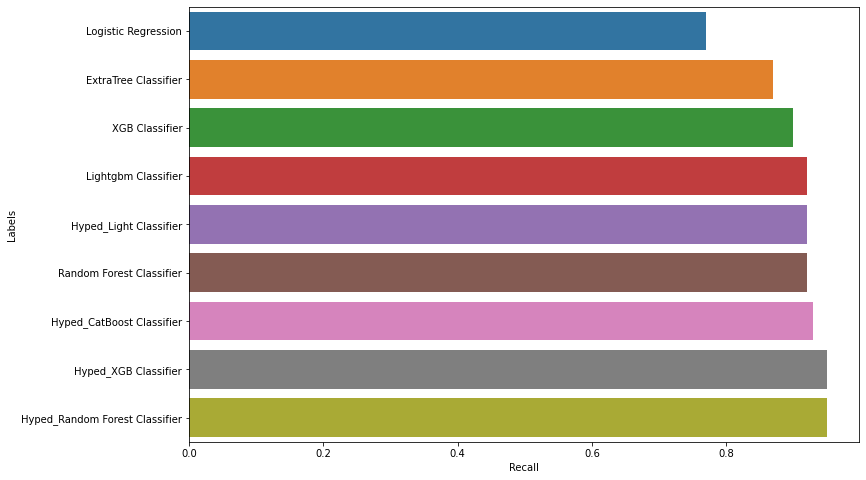

In [44]:
#ploting a barchart to show the recall_score scores of each model  
y_axis=['Logistic Regression' ,'ExtraTree Classifier', 'Lightgbm Classifier', 'Hyped_Light Classifier',
       'XGB Classifier', 'Hyped_XGB Classifier', 'Random Forest Classifier', 'Hyped_Random Forest Classifier', 
     'Hyped_CatBoost Classifier']

df1 = pd.DataFrame({"Labels" : y_axis, "Recall" : rec})
df1  = df1.sort_values(by = "Recall")

plt.figure(figsize = (12,8))
sns.barplot(x = "Recall", y = "Labels",data = df1, linewidth=1.5)

In [45]:
# to get the accuracy score of each model

from sklearn.metrics import accuracy_score

for (i,j) in zip(predictions, models):
        model_recall = accuracy_score(y_test, i)
        print("The accuracy score for {} is {}".format(j, model_recall))


The accuracy score for Logistic Regression is 0.819672131147541
The accuracy score for ExtraTree Regression is 0.8688524590163934
The accuracy score for LightgbmClassifier is 0.9344262295081968
The accuracy score for Hyped_Light Classifier is 0.9180327868852459
The accuracy score for XGB Classifier is 0.9016393442622951
The accuracy score for Hyped_XGB Classifier is 0.9262295081967213
The accuracy score for Random Forest Classifier is 0.8770491803278688
The accuracy score for Hyped_Random Forest Classifier is 0.9016393442622951
The accuracy score for Hyped_CatBoost Classifier is 0.9180327868852459


#### Hyped_XGB Classifier and LightgbmClassifier gave us the highest accuracy of 0.93

In [46]:
accuracy = [lr_acc, tree_acc, lgbm_acc,lgbm1_acc, xgb_acc, xgb1_acc, rf_acc, rf1_acc,  cat1_acc]

In [47]:
acc = []
for i in accuracy:
    r = round(i, 3)
    acc.append(r)

In [48]:
acc

[0.82, 0.869, 0.934, 0.918, 0.902, 0.926, 0.877, 0.902, 0.918]

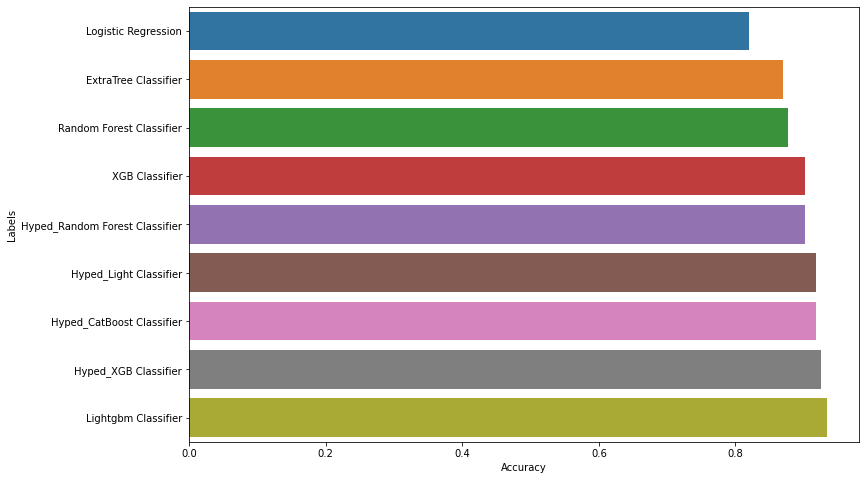

In [49]:
#ploting a barchart to show the rmse scores of each model  

y_axis=['Logistic Regression' ,'ExtraTree Classifier', 'Lightgbm Classifier', 'Hyped_Light Classifier',
       'XGB Classifier', 'Hyped_XGB Classifier', 'Random Forest Classifier',
        'Hyped_Random Forest Classifier', 'Hyped_CatBoost Classifier']

df2 = pd.DataFrame({"Labels" : y_axis, "Accuracy" : acc})
df2  = df2.sort_values(by = "Accuracy")

plt.figure(figsize = (12,8))
sns.barplot(x = "Accuracy", y = "Labels",data = df2, linewidth=1.5)

